<a href="https://colab.research.google.com/github/joylin0209/final-project/blob/main/Final_Project_tainu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Packages**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 1. Load the Data

Scrap the data from a Taiwan online forum,"Ptt"

In [ ]:
!pip install requests_html
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import bs4
import requests
from requests_html import HTML
import re
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

ua = UserAgent()

res = requests.get("https://www.google.com/", headers={
    "User-Agent": ua.random
})


In [ ]:
#the process of scrap one post from ppt

def get_ptt(url):
    # set up the Header and Cookie
    my_headers = {'cookie': 'over18=1;'}
    # sen get request ptt gossip board
    response = requests.get(url, headers=my_headers)

    # put URL into bs4model analysis
    soup = bs4.BeautifulSoup(response.text, "html.parser")

    # PTT columns
    header = soup.find_all('span', 'article-meta-value')

    # auther
    ptt_author = header[0].text
    # board
    ptt_board = header[1].text
    # tittle
    ptt_title = header[2].text
    # date
    ptt_date = header[3].text


    main_container = soup.find(id='main-container')
    # scrap all the text
    all_text = main_container.text
    pre_text = all_text.split('--')[0]

    texts = pre_text.split('\n')
    contents = texts[2:]
    ptt_content = '\n'.join(contents)

    # save the result to DataFrame
    df = pd.DataFrame({
        'author': [ptt_author],
        'board': [ptt_board],
        'tittle': [ptt_title],
        'date': [ptt_date],
        'content': [ptt_content],
    })

    return df, ptt_content  # 返回 DataFrame 和 ptt_content

# 使用示例
url = "https://www.ptt.cc/bbs/Boy-Girl/M.1703985892.A.5CB.html"
result_df, ptt_content = get_ptt(url)
print(result_df)
print(ptt_content)

           author     board         tittle                      date  \
0  sky2030 (無業遊民)  Boy-Girl  [心情] 出國巧遇台女趣事  Sun Dec 31 09:24:50 2023   

                                             content  
0  最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...  
最近常跟朋友一起跑胡志明，河內玩

玩什麼就不要問了

某天晚上 剛好在一間麵店吃飯，隔壁桌坐了兩個台女

應該也是自由行來玩…

於是我就暗示我朋友不要講話 假裝聽不懂

安靜的吃麵

於是聽到台女各種抱怨胡志明

真的是快笑死…87%在台灣當慣了大小姐

他們邊吃還邊不時 往我們這裡打量

可能是因為我朋友頗帥的 又或是我們穿著不像越南人

吃完後 我們在店門口等車，她們也出來了    我們還是假裝聽不懂

其中一個女生 突然說要去廁所

回頭跟店家借廁所…然後當場被店家拒絕

我看她的表情 超級不爽 轉頭跟同伴抱怨

我心裡真的快笑死

自以為在台灣橫著走 出了國別人就要理你嗎？

越南最不缺的就是妹 ok?

於是我不演了 好意跟她說 你給個1-2萬盾（台幣10塊）他就借你了 如果你急的話

聽完她也不會說謝謝 繼續繃著臉…

好吧…我也不理她了

我們車來了就離開了

我猜 他們的os 可能是 搞屁啊 老娘在台灣可是一堆工具人 舔狗

沒想到來越南還要被門口阿桑白眼 上廁所 還要付錢…


說句難聽一點，也就台灣處處讓著台女而已，千萬不要以為自己真的是鑲金的

我朋友說 幹 你真的很靠北 但我喜歡！






In [ ]:
def get_ptt_article_info(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 八卦版
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4模組分析
    soup = bs4.BeautifulSoup(response.text, "html.parser")

    # PTT 上方4個欄位
    header = soup.find_all('span', 'article-meta-value')

    # 作者
    author = header[0].text
    # 看版
    board = header[1].text
    # 標題
    title = header[2].text

    # 提取日期中的年份和月份
    date_text = header[3].text
    date_match = re.search(r'(\w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''


    # 類型
    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    # 查找所有html 元素 抓出內容
    main_container = soup.find(id='main-container')
    # 把所有文字都抓出來
    all_text = main_container.text
    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]

    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    # 存儲到 DataFrame
    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'content': [ptt_content],
    })

    return df

# 多个链接
urls = [
    "https://www.ptt.cc/bbs/Boy-Girl/M.1703985892.A.5CB.html","https://www.ptt.cc/bbs/Boy-Girl/M.1701610428.A.229.html","https://www.ptt.cc/bbs/Boy-Girl/M.1700645722.A.D02.html","https://www.ptt.cc/bbs/Boy-Girl/M.1699620647.A.889.html"
]

# 存儲到 DataFrame 的列表
df_list = []

# 循环处理每个链接
for url in urls:
    result_df = get_ptt_article_info(url)
    df_list.append(result_df)

# 合并所有 DataFrame
final_df = pd.concat(df_list, ignore_index=True)

# 顯示最終的 DataFrame
print(final_df)

                 author     board                 tittle     date  \
0        sky2030 (無業遊民)  Boy-Girl          [心情] 出國巧遇台女趣事  2023-12   
1  iamjimhaha (磨刀霍霍向肥羊)  Boy-Girl  [討論] 找台女不找外配是不是因為不想養？            
2     Sugimoto5566 (馬丁)  Boy-Girl  [討論] 印度移工如果來台,台女會怎麼選?  2023-11   
3   motivate (motivate)  Boy-Girl    [討論] 台女會覺得外籍新娘是威脅嗎?  2023-11   

                                             content  
0  最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...  
1  最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...  
2  最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...  
3  最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...  


In [ ]:
def get_article_links(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 表特版搜尋頁面
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4 模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # 找出所有文章連結
    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

# 要搜索的 PTT 表特板链接
search_url = "https://www.ptt.cc/bbs/Boy-Girl/search?q=%E5%8F%B0%E5%A5%B3"

# 获取文章链接
article_links = get_article_links(search_url)

# 打印结果
for link in article_links:
    print(link)


https://www.ptt.cc/bbs/Boy-Girl/M.1708278726.A.15D.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707849685.A.3FC.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707787719.A.6B6.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707762009.A.75F.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707759221.A.FE2.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707756382.A.D38.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707752012.A.A65.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707742476.A.682.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707729930.A.E50.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707720381.A.23C.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707695449.A.A87.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707681367.A.5DC.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707633547.A.9B9.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707468696.A.133.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707389771.A.74D.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707388776.A.F5A.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707320692.A.383.html
https://www.ptt.cc/bbs/Boy-Girl/M.1707298653.A.3

In [ ]:
def get_ptt_article_info(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 八卦版
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # PTT 上方4個欄位
    header = soup.find_all('span', 'article-meta-value')

    # 作者
    author = header[0].text
    # 看版
    board = header[1].text
    # 標題
    title = header[2].text

    # 提取日期中的年份和月份
    date_text = header[3].text
    date_match = re.search(r'(\w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    # 類型
    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    # 查找所有html 元素 抓出內容
    main_container = soup.find(id='main-container')
    # 把所有文字都抓出來
    all_text = main_container.text
    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]

    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    # 存儲到 DataFrame
    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'content': [content],
    })

    return df

def get_article_links(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 表特版搜尋頁面
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4 模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # 找出所有文章連結
    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def get_ptt_data_frame(search_url):
    # 获取文章链接
    article_links = get_article_links(search_url)

    # 存儲到 DataFrame 的列表
    df_list = []

    # 循环处理每个链接
    for url in article_links:
        result_df = get_ptt_article_info(url)
        df_list.append(result_df)

    # 合并所有 DataFrame
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# 使用 get_ptt_data_frame 函数获取并打印文章信息的 DataFrame
bg_df = get_ptt_data_frame(search_url)
print(bg_df)


                   author     board                    tittle     date  \
0      Subaru5566 (愛上速霸路)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
1             cyberia (狸)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
2             dntm (dntm)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
3        win7946 (超級牡羊一哥)  Boy-Girl    Re: [討論] 假如費倫是台女會受歡迎嗎？  2024-02   
4         owo0204 (大大大優惠)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
5    oion13272613 (虛虛打八八)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
6            aoksc (重出江湖)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
7      breathair (拆了？簡單了)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
8       moshenisshit (嘻嘻)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
9   B0988698088 (廢文少女小円♥)  Boy-Girl        [討論] 假如費倫是台女會受歡迎嗎？  2024-02   
10              jamo (hi)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
11              jamo (hi)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02   
12            hips (hips)  Boy-Girl  R

In [ ]:
def remove_patterns(text):
    text = re.sub(r'^※.*\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^:.*\n', '', text, flags=re.MULTILINE)
    return text


def get_ptt_article_info(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # PTT 上方4個欄位
    header = soup.find_all('span', 'article-meta-value')

    # 检查 header 是否为空，如果为空，返回一个默认值的 DataFrame
    if not header or len(header) != 4:
        return pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'content': ['N/A'],
        })

    # 作者
    author = header[0].text
    # 看版
    board = header[1].text
    # 標題
    title = header[2].text

    # 提取日期中的年份和月份
    date_text = header[3].text
    date_match = re.search(r'(\w{3} (\s\d{1}|\d{2}) \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    # 類型
    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    # 查找所有html 元素 抓出內容
    main_container = soup.find(id='main-container')

    # 把所有文字都抓出來
    all_text = ' '.join([remove_patterns(container.text) for container in main_container])

    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]

    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    # 存儲到 DataFrame
    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'content': [content],
    })

    return df


def get_article_links(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 表特版搜尋頁面
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4 模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # 找出所有文章連結
    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def process_urls(urls):
    # 存儲到 DataFrame 的列表
    df_list = []
    article_links = get_article_links(search_url)
    # 循环处理每个链接
    for url in urls:
        # 获取文章信息 DataFrame
        article_links = get_article_links(url)
        for link in article_links:
          result_df = get_ptt_article_info(link)
          # 检查是否为默认值，如果不是再添加到结果列表
          if not result_df.equals(pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'content': ['N/A'],
          })):
              df_list.append(result_df)

    # 合并所有 DataFrame
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# 构造链接列表
base_url = "https://www.ptt.cc/bbs/Boy-Girl/search?page={}&q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 19  # 设置目标页数

# 构造链接列表
urls_to_process = [base_url.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultbg_df = process_urls(urls_to_process)

# 打印最终的 DataFrame
print(resultbg_df)



                                  author     board                    tittle  \
0                     Subaru5566 (愛上速霸路)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
1                            cyberia (狸)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
2                            dntm (dntm)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
3                       win7946 (超級牡羊一哥)  Boy-Girl    Re: [討論] 假如費倫是台女會受歡迎嗎？   
4                        owo0204 (大大大優惠)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
..                                   ...       ...                       ...   
373                     sumade (斬卍凱蒂貓卍佛)  Boy-Girl   Re: [求助]年近40的台女註定嫁不出去嗎?   
374                    infact0103 (湛藍之心)  Boy-Girl       [求助]年近40的台女註定嫁不出去嗎?   
375  earnestwilde (18th pale descendant)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   
376                        dsp (前程往事成雲煙)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   
377                    freshguy (懷念不如相見)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   

        date article_type              

In [ ]:
def remove_patterns(text):
    text = re.sub(r'^※.*\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^:.*\n', '', text, flags=re.MULTILINE)
    return text


def get_ptt_article_info(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # PTT 上方4個欄位
    header = soup.find_all('span', 'article-meta-value')

    # 检查 header 是否为空，如果为空，返回一个默认值的 DataFrame
    if not header or len(header) != 4:
        return pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'content': ['N/A'],
        })

    # 作者
    author = header[0].text
    # 看版
    board = header[1].text
    # 標題
    title = header[2].text

    # 提取日期中的年份和月份
    date_text = header[3].text
    date_match = re.search(r'(\w{3} (\s\d{1}|\d{2}) \d{2}:\d{2}:\d{2} \d{4})', date_text)
    date = pd.to_datetime(date_match.group(1), format='%b %d %H:%M:%S %Y').strftime('%Y-%m') if date_match else ''

    # 類型
    type_match = re.search(r'\[(.*?)\]', title)
    article_type = type_match.group(1) if type_match else ''

    # 查找所有html 元素 抓出內容
    main_container = soup.find(id='main-container')

    # 把所有文字都抓出來
    all_text = ' '.join([remove_patterns(container.text) for container in main_container])

    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]

    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    # 存儲到 DataFrame
    df = pd.DataFrame({
        'author': [author],
        'board': [board],
        'tittle': [title],
        'date': [date],
        'article_type': [article_type],
        'content': [content],
    })

    return df


def get_article_links(url):
    # 設定Header與Cookie
    my_headers = {'cookie': 'over18=1;'}
    # 發送get 請求 到 ptt 表特版搜尋頁面
    response = requests.get(url, headers=my_headers)

    # 把網頁程式碼(HTML) 丟入 bs4 模組分析
    soup = BeautifulSoup(response.text, "html.parser")

    # 找出所有文章連結
    article_links = []
    for entry in soup.find_all("div", class_="r-ent"):
        if entry.find("a"):
            article_links.append("https://www.ptt.cc" + entry.find("a")["href"])

    return article_links

def process_urls(urls):
    # 存儲到 DataFrame 的列表
    df_list = []
    article_links = get_article_links(search_url)
    # 循环处理每个链接
    for url in urls:
        # 获取文章信息 DataFrame
        article_links = get_article_links(url)
        for link in article_links:
          result_df = get_ptt_article_info(link)
          # 检查是否为默认值，如果不是再添加到结果列表
          if not result_df.equals(pd.DataFrame({
            'author': ['N/A'],
            'board': ['N/A'],
            'tittle': ['N/A'],
            'date': ['N/A'],
            'article_type': ['N/A'],
            'content': ['N/A'],
          })):
              df_list.append(result_df)

    # 合并所有 DataFrame
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

# 构造链接列表
base_url = "https://www.ptt.cc/bbs/Boy-Girl/search?page={}&q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 19  # 设置目标页数

# 构造链接列表
urls_to_process = [base_url.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultbg_df = process_urls(urls_to_process)

# 打印最终的 DataFrame
print(resultbg_df)


                                  author     board                    tittle  \
0                     Subaru5566 (愛上速霸路)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
1                            cyberia (狸)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
2                            dntm (dntm)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
3                       win7946 (超級牡羊一哥)  Boy-Girl    Re: [討論] 假如費倫是台女會受歡迎嗎？   
4                        owo0204 (大大大優惠)  Boy-Girl  Re: [討論] 為什麼台女生小孩意願全球最低?   
..                                   ...       ...                       ...   
373                     sumade (斬卍凱蒂貓卍佛)  Boy-Girl   Re: [求助]年近40的台女註定嫁不出去嗎?   
374                    infact0103 (湛藍之心)  Boy-Girl       [求助]年近40的台女註定嫁不出去嗎?   
375  earnestwilde (18th pale descendant)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   
376                        dsp (前程往事成雲煙)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   
377                    freshguy (懷念不如相見)  Boy-Girl  Re: [分享] 難怪台女會認為現代台男一堆媽寶   

        date article_type              

In [ ]:
# 构造链接列表
base_url2 = "https://www.ptt.cc/bbs/C_Chat/search?page=1&q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 2  # 设置目标页数

# 构造链接列表
urls_to_process2 = [base_url2.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultcchat_df = process_urls(urls_to_process2)

# 打印最终的 DataFrame
print(resultcchat_df)

                      author   board                       tittle     date  \
0     kingkiller (國王殺手●地獄騎士)  C_Chat                [問題] 肥倫是不是台女?  2024-02   
1            callhek (沒錢住帝寶)  C_Chat       [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
2               Daihao (TDH)  C_Chat               [我推] 美彌子算是台女嗎？  2023-07   
3     alucard6310 (人生只為漫畫而活)  C_Chat          [閒聊] 台女V挑戰500元過一個禮拜  2023-07   
4              moocow (void)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
5      sakurammsrx (+9肥宅算盤子)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
6      arsl400 (dark hatter)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
7       oion13272613 (虛虛打八八)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
8          krousxchen (城府很深)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
9           wahaha99 (此方不可長)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
10            s7503228 (情報屋)  C_Chat          Re: [閒聊] 小S是一代台女代表嗎  2023-06   
11             aaaa8129 (阿睿)  C_Chat          Re: [閒聊] 小S是一代台女代表

In [ ]:
# 构造链接列表
base_url3 = "https://www.ptt.cc/bbs/Gossiping/search?q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 126  # 设置目标页数

# 构造链接列表
urls_to_process3 = [base_url3.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultgos_df = process_urls(urls_to_process3)

# 打印最终的 DataFrame
print(resultgos_df)

                      author      board                       tittle     date  \
0     mark751019 (☆比哈士奇帥一點☆)  Gossiping      [問卦] 台女不生不婚 引進北韓妹子相親好嗎?  2024-03   
1            mikasamikoto ()  Gossiping               [問卦]台女真的毛那麼多嗎？  2024-03   
2              Aloee (Aloee)  Gossiping           [新聞] 台女：打仗男生要會保護女生  2024-03   
3             kikiki37 (441)  Gossiping       [問卦] 台女去日本發展後，為何就不回台了?  2024-03   
4      yuan55226 (Yuan55226)  Gossiping     Re: [問卦] 現代台女生完小孩剩不到半條命?  2024-03   
...                      ...        ...                          ...      ...   
2515      pttbeigowow (想狗窩啊)  Gossiping            [問卦] 台男台女為什麼差這麼多？  2024-03   
2516    lunenera (Lune Nera)  Gossiping     [問卦] 印度移工集體性侵台女致死時要怎麼回答?  2024-03   
2517    arch20161219 (肥冷淬這樣)  Gossiping          [問卦] 印度男吃的下台女子舉重柔道嗎  2024-03   
2518         cc02040326 (茶包)  Gossiping     [問卦] 叫認識沒多久的台女幫挖耳朵會不會很奇怪  2024-03   
2519   zxc17893 (手寫信才能被淚水打濕)  Gossiping  Re: [問卦] 台女都去生小孩當主婦國家經濟怎麼辦？  2024-03   

     article_type          

In [ ]:
# 构造链接列表
base_url4 = "https://www.ptt.cc/bbs/HatePolitics/search?q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 1 # 设置目标页数

# 构造链接列表
urls_to_process4 = [base_url4.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resulthp_df = process_urls(urls_to_process4)

# 打印最终的 DataFrame
print(resulthp_df)

               author         board                        tittle     date  \
0   zakijudelo (Zack)  HatePolitics          [討論] 台女會羨慕蔡英文不用應付婆家？  2024-02   
1  eric2016 (大內嬉皮零靈性)  HatePolitics      [黑特] HIV洋腸：王志安你看我羞辱台女都沒事  2024-01   
2      hayuyang (鳳山蠹)  HatePolitics     [討論] 台女看到國中生就排卵了 還嘴台男愛正妹?  2024-01   
3       a874622 (流浪者)  HatePolitics     [討論]現代台女典範大小S,現代台男標準典範是誰   2024-01   
4   meredith001 (￣▽￣)  HatePolitics  Re: [討論] 為什麼柯文哲的支持者台男比台女還多??  2024-01   
5   kerkerson (高處不勝寒)  HatePolitics      [討論] 為什麼柯文哲的支持者台男比台女還多??  2024-01   
6       eric2016 (孤峰)  HatePolitics    [新聞] 老外直播主約砲台女為樂！曾無套HIV女　Y  2024-01   

  article_type                                            content  
0           討論  身為台灣不婚不生族的表率\n可以自由自在、禍國殃民\n而且還不用被先生的家族拘束\n順便放任...  
1           黑特  \n回想上個月才有一位被控染上HIV、喜愛無套盜攝臭名昭彰的洋男直播主，飛來台灣獵豔\n並散...  
2           討論  農婦\n\n現在是看到政治人物國中生未成年就排卵\n\n綠粉台女就這種等級啊?\n\n\n以...  
3           討論  一般說現代台灣女性價值觀,\n男女擇偶觀,行事風格受康熙來了\n和娛樂百分百大小S潛移默化影...  
4           討論  \n\n沒辦法 柯布林實在是太噁心了\

In [ ]:
# 构造链接列表
base_url5 = "https://www.ptt.cc/bbs/Marginalman/search?q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 2 # 设置目标页数

# 构造链接列表
urls_to_process5 = [base_url5.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultmar_df = process_urls(urls_to_process5)

# 打印最终的 DataFrame
print(resultmar_df)

                               author        board  \
0                TokiwaKurumi (ロゼリアー)  Marginalman   
1                Chibistars (奏手的畢業論文)  Marginalman   
2   Megacolon (Work for HimemoriLuna)  Marginalman   
3                    Kazama168 (チャキ丸)  Marginalman   
4               walter741225 (瓦特 \|/)  Marginalman   
5                   XROCK (miComet最強)  Marginalman   
6                   jensheng09 (真神九號)  Marginalman   
7                      Watame (角巻わため)  Marginalman   
8                  RosieChaeng (我愛彩英)  Marginalman   
9                 ptt987654321 (大谷躺平)  Marginalman   
10               MeiHS (簽名檔詳見 其他版晃到，)  Marginalman   
11                    a2382307 (高山流水)  Marginalman   
12                 CheshireCat (妙妙貓♡)  Marginalman   
13               AceChen21 (泣いて馬超を斬る)  Marginalman   
14                better83214 (姑姑大白兔)  Marginalman   
15                    Leaflock (寬鬆世代)  Marginalman   
16              walter741225 (瓦特 \|/)  Marginalman   
17  Megacolon (Work for Hime

In [ ]:
# 构造链接列表
base_url6 = "https://www.ptt.cc/bbs/sex/search?q=%E5%8F%B0%E5%A5%B3"
start_page = 1
end_page = 5 # 设置目标页数

# 构造链接列表
urls_to_process6 = [base_url5.format(page) for page in range(start_page, end_page + 1)]

# 处理新链接
resultsex_df = process_urls(urls_to_process5)

# 打印最终的 DataFrame
print(resultsex_df)

                               author        board  \
0                TokiwaKurumi (ロゼリアー)  Marginalman   
1                Chibistars (奏手的畢業論文)  Marginalman   
2   Megacolon (Work for HimemoriLuna)  Marginalman   
3                    Kazama168 (チャキ丸)  Marginalman   
4               walter741225 (瓦特 \|/)  Marginalman   
5                   XROCK (miComet最強)  Marginalman   
6                   jensheng09 (真神九號)  Marginalman   
7                      Watame (角巻わため)  Marginalman   
8                  RosieChaeng (我愛彩英)  Marginalman   
9                 ptt987654321 (大谷躺平)  Marginalman   
10               MeiHS (簽名檔詳見 其他版晃到，)  Marginalman   
11                    a2382307 (高山流水)  Marginalman   
12                 CheshireCat (妙妙貓♡)  Marginalman   
13               AceChen21 (泣いて馬超を斬る)  Marginalman   
14                better83214 (姑姑大白兔)  Marginalman   
15                    Leaflock (寬鬆世代)  Marginalman   
16              walter741225 (瓦特 \|/)  Marginalman   
17  Megacolon (Work for Hime

In [ ]:
import pandas as pd


list_of_dfs = [resultbg_df, resultcchat_df, resultgos_df, resulthp_df, resultmar_df, resultsex_df]

pttDF = pd.concat(list_of_dfs, ignore_index=True)


print(pttDF)

                                 author        board  \
0                    Subaru5566 (愛上速霸路)     Boy-Girl   
1                           cyberia (狸)     Boy-Girl   
2                           dntm (dntm)     Boy-Girl   
3                      win7946 (超級牡羊一哥)     Boy-Girl   
4                       owo0204 (大大大優惠)     Boy-Girl   
...                                 ...          ...   
3020                    Leaflock (寬鬆世代)  Marginalman   
3021              walter741225 (瓦特 \|/)  Marginalman   
3022  Megacolon (Work for HimemoriLuna)  Marginalman   
3023                       tomuy (咖啡中毒)  Marginalman   
3024              hollande (豊川祥子的專屬刻印蟲)  Marginalman   

                        tittle     date article_type  \
0     Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02           討論   
1     Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02           討論   
2     Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02           討論   
3       Re: [討論] 假如費倫是台女會受歡迎嗎？  2024-02           討論   
4     Re: [討論] 為什麼台女生小孩意願全球最低?  2024-02        

After scraping the posts and saved them as csv data, we can see the data below:

In [1]:
ptt = pd.read_csv("/content/drive/MyDrive/SOCI40133/PTTdata3.csv")

NameError: name 'pd' is not defined

In [ ]:
ptt = ptt.rename(columns={'作者':'users', '看板':'board','標題':'tittle','日期':'date','內文': 'text','類型':'type'})

In [ ]:
ptt

,users,board,tittle,date,type,text
0,sky2030 (無業遊民),Boy-Girl,[心情] 出國巧遇台女趣事,2023-12,心情,最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...
1,iamjimhaha (磨刀霍霍向肥羊),Boy-Girl,[討論] 找台女不找外配是不是因為不想養？,2023-12,討論,\n發現有些台男\n明明就找不到對象\n卻不願意找外籍\n\n是否是因為找台女還能要求有工作...
2,Sugimoto5566 (馬丁),Boy-Girl,"[討論] 印度移工如果來台,台女會怎麼選?",2023-11,討論,未來的有一天\n\n如果印度的移工來到台灣\n\n街上勢必有更多印度男\n\n印度男有深邃的...
3,corydoras09 (),Boy-Girl,Re: [討論] 為何台女很少會主動認錯?,2023-11,討論,我有遇過那種我完全沒錯的女生\n死的都能掰成活的\n但那時候暈船暈的厲害\n所以一直舔\n現...
4,drinkmuffin (暢飲鬆餅),Boy-Girl,Re: [討論] 為何台女很少會主動認錯?,2023-11,討論,\n \n？？？\n我遇到的比較多是台男才少主動認錯吧？\n \n一推愛面子愛到不行 說話...
...,...,...,...,...,...,...
2964,ChrisDavis (工業電風扇),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,→ waitan: 你島棒球豚嘎器仔很多的 ...
2965,Vedan (味丹),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,\n這就惡性循環\n\n剛開始只有部分台男這樣\n\n然後讓部分台女食髓知味\n\n接著你本...
2966,takashi001 (沙花叉クロヱ的狗),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,確實\n\n與其看啦啦隊\n\n不如去交女朋友\n\n然後叫她穿拉拉隊服在你身上搖==\n\...
2967,wahaha99 (我討厭人類),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,\n雀食\n不過問題來了\n為什麼台男變這麼可悲\n\n全世界範圍\n好像台男特別可悲\n\...


# Counting words



The below code is using for counting the number of times each word occurs within the corpus.



In [ ]:
import jieba
import re

import jieba
import re

# 加载自定义词典
custom_dictionary = [
    "台男 500",
    "台女 500",
    "許多 50",
    "好處 50",
    "沒好處 300",
    "男生 100",
    "女生 100",
    "外國 100",
    "外國人 500",
    "移工 300",
    "變性人 500",
    "好嗎 500",
    "也許 300",
    "女同學 500",
    "日韓 500",
    "雞掰郎 1000",
    "雞掰 500",
    "癱瘓 500",
    "產後 1000",
    "生產 1000",
    "國家 500",
    "人種 500",
    "關係 500",
    "配上 300",
    "喜歡 500",
    "不喜歡 500",
    "長得 500",
    "變化 500",
    "徐巧芯 300,",
    "醜 3000",
    "醜女 5000"
    "對待 1000",
    "台灣 5000",
    "戀愛 1000",
    "談戀愛 3000"




]

# 将自定义字典内容写入到文件中
with open("custom_dict.txt", "w", encoding="utf-8") as f:
    for line in custom_dictionary:
        f.write(line + "\n")

# 加载自定义字典
jieba.load_userdict("custom_dict.txt")

# 定义一个定制的分词函数，并过滤掉停用词
def tokenize_chinese(text):
    tokens = jieba.cut(text)

    # 过滤掉停用词和非中文字符
    stop_words = ['的', '了', '呢', '和','嗎','也','跟','在','又','吧','是','只','比','都','啦','再','更','但','先','把']  # 添加您希望过滤掉的停用词
    tokens = [token for token in tokens if token not in stop_words and re.match(r'^[\u4e00-\u9fa5]+$', token)]



    return tokens

# 应用定制的分词函数到你的 DataFrame
ptt['chinese_tokenized'] = ptt['text'].apply(tokenize_chinese)

# 显示结果
print(ptt[['chinese_tokenized']][:10])


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.924 seconds.
DEBUG:jieba:Loading model cost 0.924 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


                                   chinese_tokenized
0  [最近, 常, 朋友, 一起, 跑, 胡志明, 河內, 玩, 玩什麼, 就, 不要, 問了,...
1  [發現, 有些, 台男, 明明, 就, 找, 不到, 對象, 卻, 不願意, 找, 外籍, ...
2  [未來, 有, 一天, 如果, 印度, 移工, 來, 到, 台灣, 街上, 勢必, 有, 多...
3  [我, 有, 遇過, 那種, 我, 完全, 沒錯, 女生, 死, 能, 掰, 成活, 那, ...
4  [我, 遇到, 較, 多, 台男, 才, 少主動, 認錯, 一, 推愛, 面子, 愛到, 不...
5  [有些, 人超, 奇怪, 你, 用, 他, 對, 待, 你, 方式, 對待, 他, 他, 就...
6  [結論, 不會, 因為, 台男, 裡面, 一堆, 智能, 障礙, 自大, 還, 自我, 優,...
7  [女生, 有, 三六九等, 男生, 有, 三六九等, 如果, 你, 討論, 教育, 程度, ...
8  [影片, 年前, 變性人, 劉熏, 愛, 接受, 記者, 訪問, 白色, 女記者, 非常, ...
9  [這也, 不是, 只有, 台女, 問題, 喇, 台灣, 發展, 過程, 造成, 所有人, 巨...


In [ ]:
import jieba.posseg as pseg

# 定义一个函数，对每个句子进行词性标注
def pos_tagging(tokenized_text):
    # 将列表中的词语连接成字符串
    sentence = ''.join(tokenized_text)
    words = pseg.cut(sentence)
    return [(word, flag) for word, flag in words]

# 对 DataFrame 中的 chinese_tokenized 列应用词性标注函数
ptt['pos_tagged'] = ptt['chinese_tokenized'].apply(pos_tagging)


In [ ]:
print(ptt[['pos_tagged']][:10])

                                          pos_tagged
0  [(最近, f), (常, d), (朋友, n), (一起, m), (跑, v), (胡...
1  [(發現, v), (有些, r), (台男, x), (明明, t), (就, d), (...
2  [(未來, t), (有, v), (一天, m), (如果, c), (印度, ns), ...
3  [(我, r), (有, v), (遇, v), (過, ug), (那種, r), (我,...
4  [(我, r), (遇到, v), (較, d), (多, m), (台男, x), (才,...
5  [(有些, r), (人, n), (超, v), (奇怪, v), (你, r), (用,...
6  [(結論, n), (不, d), (會, v), (因為, c), (台男, x), (裡...
7  [(女生, n), (有, v), (三六九等, m), (男生, n), (有, v), ...
8  [(影片, n), (年前, t), (變性人, x), (劉熏愛, nr), (接受, v...
9  [(這, r), (也, d), (不是, c), (只有, c), (台女, x), (問...


n: Noun

nr: Personal Name

ns: Place Name

nt: Organization Name

nz: Other Proper Noun

t: Time Word

s: Locative Word

v: Verb

a: Adjective


d: Adverb

f: Directional Word

m: Numeral

q: Quantifier

r: Pronoun

p: Preposition

c: Conjunction

u: Auxiliary Word

e: Interjection

y: Modal Particle

o: Onomatopoeia

h: Prefix

k: Suffix

x: Non-lexeme

w: Punctuation Mark

z: Other

Check for words that are not successfully tagged and mark them manually

In [ ]:
# 创建一个空集合来存储被标记为 'x' 的词语，确保每个词语只出现一次
x_words = set()

# 遍历 pos_tagged 列中的每个词性标记列表
for tagged_words in ptt['pos_tagged']:
    # 遍历每个词性标记列表中的每个元组
    for word, pos in tagged_words:
        # 如果词性为 'x'，则将词语添加到 x_words 集合中
        if pos == 'x':
            x_words.add(word)

# 打印出被标记为 'x' 的词语列表
print(x_words)



{'濕', '喜歡', '戀愛', '壞', '讀', '搖', '顧', '衝', '談戀愛', '生產', '妳', '好處', '謂', '蠻', '馬', '觀', '黨', '諸', '麽', '談', '憂', '貶', '話', '妝', '撿', '嫑', '軌', '人種', '詞', '約', '國家', '圍', '論', '也許', '雞掰郎', '唷', '靈', '蘇', '幫', '滾', '勧', '醬', '種', '課', '窩', '臺', '對', '關係', '擺', '賺', '歐', '移工', '養', '艦', '臉', '語', '討', '變性人', '輩', '見', '較', '極', '覺', '駐', '該', '碼', '滿', '罵', '賤', '讓', '皺', '撐', '尬', '綠', '女同學', '鬆', '鄉', '貸', '淪', '聖', '輸', '台女', '負', '噓', '貨', '買', '設', '漢', '錢', '讚', '擇', '庫', '癱瘓', '外國人', '產後', '嗆', '業', '釘', '動', '外國', '劇', '齁', '獃', '變化', '台男', '囉', '還', '沒好處', '髒', '機', '藍', '複', '擾', '雞掰', '龍', '隊', '嗦', '不喜歡', '好嗎', '長得', '台灣', '嬯', '撈', '傳', '廢', '處', '日韓', '許多', '質', '塊', '閒', '闒'}


In [ ]:
# 遍历 pos_tagged 列中的每个词性标记
for i, row in ptt.iterrows():
    # 遍历该行中的每个词性标记
    for j, (word, pos) in enumerate(row['pos_tagged']):
        # 如果词性标记为 'x'，则更改为 'n'
        if pos == 'x' and word in ['人種', '變化','產後','課','貨', '龍','關係','外國人','日韓','雞掰郎', '好處','生產', '台男','國家', '劇', '話', '台女', '女同學','外國','醜女','變性人','移工', '...']:
            ptt.at[i, 'pos_tagged'][j] = (word, 'n')
        # 如果词性标记为 'x'，则更改为 'a'
        elif pos == 'x' and word in ['髒', '你想更改的词语4','閒','藍','綠','沒好處','雞掰','廢','濕','賤','','','','','' '...']:
            ptt.at[i, 'pos_tagged'][j] = (word, 'a')
        # 如果词性标记为 'x'，则更改为 'a'
        elif pos == 'x' and word in ['撈', '討', '撿','幫','買','顧','皺','約', '擇', '喜歡','罵','衝', '擺','撐','賺','賤','動','' '...']:
            ptt.at[i, 'pos_tagged'][j] = (word, 'v')

# 打印修改后的结果
print(ptt['pos_tagged'])


0       [(最近, f), (常, d), (朋友, n), (一起, m), (跑, v), (胡...
1       [(發現, v), (有些, r), (台男, n), (明明, t), (就, d), (...
2       [(未來, t), (有, v), (一天, m), (如果, c), (印度, ns), ...
3       [(我, r), (有, v), (遇, v), (過, ug), (那種, r), (我,...
4       [(我, r), (遇到, v), (較, d), (多, m), (台男, n), (才,...
                              ...                        
2964    [(你, r), (島, n), (棒球, n), (豚, n), (嘎, o), (器, ...
2965    [(這, r), (就, d), (惡性, b), (循環, vn), (剛, d), (開...
2966    [(確實, ad), (與, p), (其, r), (看, v), (隊, n), (不如...
2967    [(雀食, n), (不過, c), (問題, n), (來, v), (為, p), (什...
2968    [(豚, n), (沒, d), (有, v), (這, r), (樣, u), (我, r...
Name: pos_tagged, Length: 2969, dtype: object


Next, I counted the number of times each word appeared

In [ ]:
import pandas as pd

# 定义一个函数来统计词语出现的次数
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        # We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    # 将结果转换为 DataFrame
    countsForFrame = {'word': [], 'count': []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

# 将 chinese_tokenized 列中的所有词语展开成一个列表
all_tokens = ptt['chinese_tokenized'].explode().tolist()

# 使用 wordCounter 函数统计词语出现次数
word_counts_df = wordCounter(all_tokens)

# 显示词频统计结果
print(word_counts_df)



      word  count
0       最近     31
1        常      5
2       朋友    226
3       一起    194
4        跑     25
...    ...    ...
12016  雖然家      2
12017   官方      2
12018   敷衍      2
12019   破防      2
12020   完原      2

[12021 rows x 2 columns]


Since this result contains various parts of speech, further analysis cannot be carried out, so I calculated the frequency of each word in adjectives, nouns, and verbs respectively.

In [ ]:
import pandas as pd
import jieba.posseg as pseg

# 定义一个函数来统计词语出现的次数
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        # We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    # 将结果转换为 DataFrame
    countsForFrame = {'word': [], 'count': []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

# 将 chinese_tokenized 列中的所有词语展开成一个列表
all_tokens = ptt['chinese_tokenized'].explode().tolist()

# 使用 wordCounter 函数统计词语出现次数
word_counts_df = wordCounter(all_tokens)

# 定义函数来获取词性
def get_word_pos(word):
    return pseg.lcut(word)[0].flag if pseg.lcut(word) else None

# 添加词性列
word_counts_df['pos'] = word_counts_df['word'].apply(get_word_pos)

# 筛选名词、形容词和动词
noun_df = word_counts_df[word_counts_df['pos'].str.startswith('n')]
adj_df = word_counts_df[word_counts_df['pos'].str.startswith('a')]
verb_df = word_counts_df[word_counts_df['pos'].str.startswith('v')]

# 打印结果
print("Top Nouns:")
print(noun_df.head(10))
print("\nTop Adjectives:")
print(adj_df.head(10))
print("\nTop Verbs:")
print(verb_df.head(10))


Top Nouns:
   word  count pos
2    朋友    226   n
5   胡志明      3  nr
18    店      2   n
22   桌坐      1  ng
28    於    743  nr
32   假裝      4   n
36   安靜      1  nr
47   小姐     14  nr
60   穿著      1   n
62  越南人      6  nr

Top Adjectives:
    word  count pos
26    自由     12   a
41     快     16   a
46     大    198   a
74    突然    135  ad
89    不爽      6   a
125    好   1306   a
196   深邃      1   a
199   健康     10   a
203  白斬雞      1   a
210   完全     69  ad

Top Verbs:
   word  count pos
4     跑     25   v
7     玩     28   v
8   玩什麼      1   v
11   問了      1   v
19    吃     98   v
25   應該    361   v
27   行來      1   v
30   暗示      5   v
31   講話     11   v
35    懂    164   v


Next, I checked the 25 most frequently occurring verbs, adjectives, and nouns to confirm whether there were any misclassifications or meaningless words. If there is any, go back and manually mark the magnetic place to make changes, or delete it directly as shown below. After doing this several times, it was confirmed that the top 25 most frequent words were all words that could be analyzed.

In [ ]:
# 按词频降序排列并显示前25个名词
sorted_noun_df = noun_df.sort_values(by='count', ascending=False)
print("Top 25 Nouns:")
print(sorted_noun_df.head(25))

# 按词频降序排列并显示前25个形容词
sorted_adj_df = adj_df.sort_values(by='count', ascending=False)
print("\nTop 25 Adjectives:")
print(sorted_adj_df.head(25))

# 按词频降序排列并显示前25个动词
sorted_verb_df = verb_df.sort_values(by='count', ascending=False)
print("\nTop 25 Verbs:")
print(sorted_verb_df.head(25))


Top 25 Nouns:
      word  count pos
100      人   1332   n
941      心   1285   n
64       後   1151  nr
531     單身   1065   n
11367   有性   1008   n
186     八卦    892   n
11440    官    882   n
11371    癖    882  ng
11370   戀童    882   n
11385   性行    757   n
11466   理事    756   n
28       於    743  nr
1282    小孩    725   n
408     問題    623   n
1124    兒子    512   n
2529    鞋子    511   n
5349    資源    507   n
11434   廖姓    504  nr
73      女生    457   n
371     男生    455   n
216     時候    448   n
1235   生小孩    402   n
493      性    396   n
7614    女子    392   n
404     女性    391   n

Top 25 Adjectives:
      word  count pos
125      好   1306   a
1026    根本    945   a
1299     老    681   a
596     穩定    274   a
3388    傷害    257   a
1837    不孝    253   a
46       大    198   a
946      高    195   a
270      差    177   a
3567     小    171   a
375      低    169   a
1519    嚴重    142   a
3159    普遍    140  ad
74      突然    135  ad
5830    不良    132   a
3095     白    131   a
3497     重    130   

In [ ]:
# 移除名词中的指定词语
noun_df = noun_df[~noun_df['word'].isin(['後','官', '於', '人','北韓','後', '心','日本','男','男女','女','假','於', '偶率', '賣子','挖耳朵'])]

# 移除形容词中的指定词语
adj_df = adj_df[~adj_df['word'].isin(['基', ' 輕人', '久 ', '低','高','直接'])]

# 移除动词中的指定词语
verb_df = verb_df[~verb_df['word'].isin(['有', '談戀', '到', '不到','要','能','會不會','去','想'])]

Then I used the word clouds to show the frequency of each word in nouns, verbs, and adjectives.

## Word Cloud


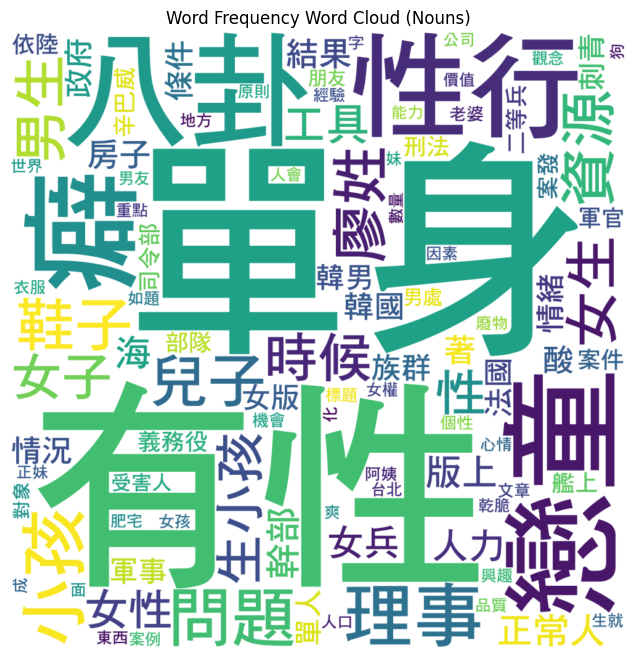

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 创建词频字典
word_freq_dict = dict(zip(noun_df['word'], noun_df['count']))



# 创建 WordCloud 对象并生成词云图像
wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white', max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)

# 设置最大字体大小，根据词频调整
max_font_size = 100  # 调整为合适的值

# 显示词云图像
plt.figure(figsize=(12, 8))  # 调整图形大小
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('Word Frequency Word Cloud (Nouns)')  # 添加标题
plt.show()

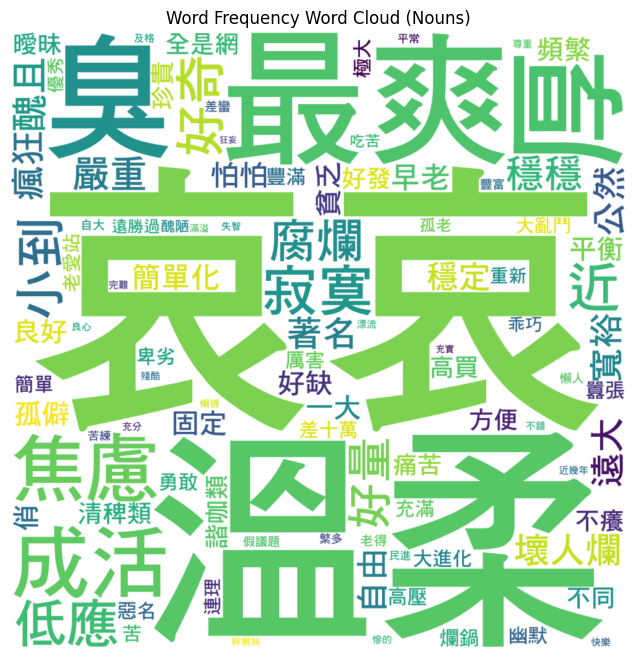

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 创建词频字典
word_freq_dict = dict(zip(adj_df['word'], noun_df['count']))

# 创建 WordCloud 对象并生成词云图像
wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white',max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)



# 显示词云图像
plt.figure(figsize=(12, 8))  # 调整图形大小
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('Word Frequency Word Cloud (Nouns)')  # 添加标题


plt.show()

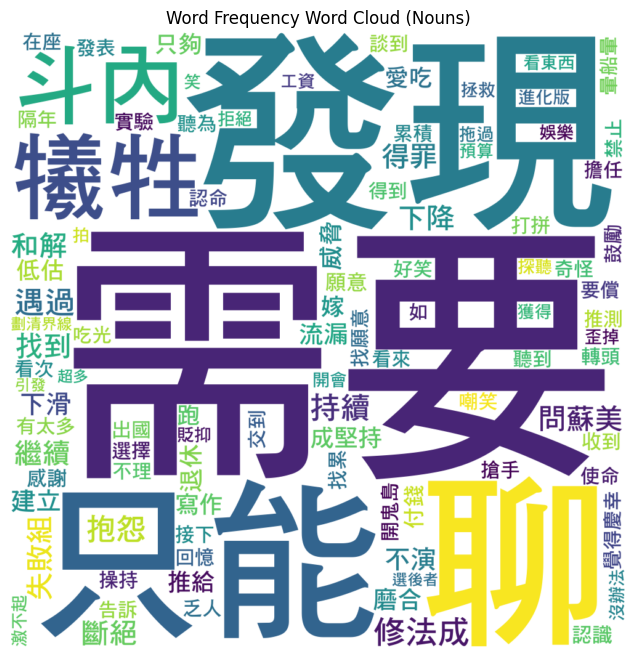

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 创建词频字典
word_freq_dict = dict(zip(verb_df['word'], noun_df['count']))

# 创建 WordCloud 对象并生成词云图像
wordcloud = WordCloud(font_path='/content/drive/MyDrive/SOCI40133/粗黑體.ttc',
                      background_color='white',max_words=100, width= 1000, height = 1000).generate_from_frequencies(word_freq_dict)

# 显示词云图像
plt.figure(figsize=(12, 8))  # 调整图形大小
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('Word Frequency Word Cloud (Nouns)')  # 添加标题
plt.show()

## Relevance of Words to paragraphs and other words

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=8a77cf74e336e82c556cfcec3969aa3bba783eb11182ee4b91062136cf0b15d8
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [ ]:
from googletrans import Translator

In [ ]:
from googletrans import Translator
import random

def translate_to_english(text):
    translator = Translator()
    translated_text = translator.translate(text, src='zh-TW', dest='en').text
    return translated_text

def extract_related_words(word, ptt):
    # 提取包含指定名詞的文章內容
    relevant_texts = ptt[ptt['pos_tagged'].apply(lambda x: any(word in pair[0] for pair in x))]['text']

    # 將所有文章內容合併成一個字符串
    combined_text = ' '.join(relevant_texts)

    # 將合併的文章內容進行分詞，並且統計形容詞和動詞出現的次數
    adj_counts = {}
    verb_counts = {}
    for pair in ptt['pos_tagged']:
        for word, pos in pair:
            if word == word:
                if 'a' in pos:  # 形容詞
                    adj_counts[word] = adj_counts.get(word, 0) + 1
                elif 'v' in pos:  # 動詞
                    verb_counts[word] = verb_counts.get(word, 0) + 1

    # 根據出現頻率排序形容詞和動詞
    sorted_adj = sorted(adj_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    sorted_verb = sorted(verb_counts.items(), key=lambda x: x[1], reverse=True)[:5]

    # 將形容詞和動詞翻譯成英文
    translated_adj = [(translate_to_english(word), count) for word, count in sorted_adj]
    translated_verb = [(translate_to_english(word), count) for word, count in sorted_verb]

    return translated_adj, translated_verb

def analyze_word(word, ptt):
    # Task 1: Grab 10 paragraphs related to the specified word
    related_paragraphs = []
    for text in ptt['text']:
        paragraphs = text.strip().split('\n\n')
        for paragraph in paragraphs:
            if word in paragraph:
                related_paragraphs.append(paragraph.strip())
                if len(related_paragraphs) >= 10:
                    break
        if len(related_paragraphs) >= 10:
            break

    # Task 2: Translate paragraphs to English
    translated_paragraphs = [translate_to_english(paragraph) for paragraph in related_paragraphs]

    # Task 3: Extract related words
    translated_adj, translated_verb = extract_related_words(word, ptt)

    # Print results
    print("10 random sentences containing the specified word：")
    for paragraph, translation in zip(related_paragraphs, translated_paragraphs):
        print("text：", paragraph)
        print("translated ext：", translation)

    print("\ncommon a.：", translated_adj)
    print("common v.：", translated_verb)

# 輸入名詞並且呼叫函數來分析
word = input("input：")
analyze_word(word, ptt)


input：單身
10 random sentences containing the specified word：
text： 結論單身獨居人口只會越來越多
translated ext： Conclusion that there will only be more and more populous population population.
text： 但是適婚年紀的單身男或女
translated ext： But a single man or woman who is suitable for marriage
text： 單身女一個人身心靈富足賺得也還夠一個人花
translated ext： Single woman alone is enough to make a person with a rich body and mind.
text： 反正單身女生的社交真的比單身男豐富太多
translated ext： Anyway
text： 整天擔心女生沒行情的單身男真的讓人無言
translated ext： I am worried that the single man who is not marketing for girls all day is really speechless
text： 台男單身的比例肯定會更高！
translated ext： The proportion of Taiwan men's single will definitely be higher!
text： 但本人的個性就是真的很難逗陣，畢業了依然維持母胎單身
translated ext： But my personality is really difficult to tease, and after graduating, I still maintain a single fetus.
text： 其實大家都只是上來打打嘴砲
母胎單身的比例本來就很低
translated ext： Actually, everyone just comes up and fights
The proportion of mother tires is already very low
text： 因此單身魯肥宅  再怎麼仇 程度有限
translate

In [ ]:
# 輸入名詞並且呼叫函數來分析
word = input("input：")
analyze_word(word, ptt)

input：男生
10 random sentences containing the specified word：
text： 男生也有三六九等
translated ext： Boys also have three, six or nine, etc.
text： 所以外國女生就算看得上台灣男生
translated ext： So even if foreign girls can see Taiwanese boys
text： 當然我不否認也是有男生會嘲笑這種變性人 但我確定這種變性者會給台女帶來威脅
translated ext： Of course, I don’t deny that some boys will laugh at this transgender person, but I am sure that this kind of transsexual person will threaten the Taiwanese girl
text： 真的很娘的男生 會懷疑他的性向
translated ext： The girl who is really a daughter -in -law will doubt his sexual orientation
text： 一般的女外勞不會對台女造成威脅 因為會娶的男生也不會多有錢
translated ext： General female foreign workers will not threaten the Taiwanese women because they will marry a boy who will not have more money.
text： 菲律賓男生很多肌肉一結一結的很好看 +工作認真
translated ext： Many muscles in the Philippines are very good -looking +serious work
text： 我聽了也是大吃一驚，男生是穩定年收破百的。
translated ext： I was surprised when I heard it. The boys were stable and broke through the year.
text： 不過時代不同了 台灣越配多了以後 建

# Relationship Between Words

## Word2Vec


I first used Gensim's Word2Vec model to learn vector representations of words.

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
pttW2V = Word2Vec(ptt['chinese_tokenized'], sg=0)

In [ ]:
vocab_list = pttW2V.wv.index_to_key
print('vocab list:', vocab_list)

vocab list: ['有', '台女', '就', '歲', '你', '我', '為', '被', '沒', '會', '很', '真的', '未成年', '說', '不', '要', '可以', '噁', '很多', '人', '好', '心', '怎麼', '不是', '後', '對', '慾', '就是', '單身', '有性', '她', '如果', '根本', '愛', '八卦', '覺得', '軍', '官', '戀童', '癖', '不會', '他', '自己', '台灣', '來', '國家', '啊', '辦', '性行', '瑋', '理事', '於', '小孩', '看到', '多', '打', '月', '這樣', '老', '讓', '談戀愛', '游', '問題', '以上', '因為', '到', '看', '與', '不到', '什麼', '誰', '台男', '發現', '穿', '其', '可能', '兒子', '鞋子', '資源', '自動', '毆', '廖姓', '牠', '去', '工作', '沒有', '女生', '男生', '時候', '請', '一直', '上', '卻', '不能', '想', '等', '日', '錢', '討論', '生小孩', '一年', '帶', '性', '還是', '女子', '女性', '工具', '一個', '及', '找', '個', '女', '正常人', '沒人', '版上', '擔任', '污染', '一塊', '兩大', '人力', '未滿', '女兵', '幹部', '海', '得', '年', '應該', '做', '認識', '生活', '所以', '一樣', '或', '一定', '有人', '結果', '已經', '著', '對方', '就算', '該', '房子', '不然', '阿', '每天', '怎樣', '知道', '表示', '貼', '處', '接受', '情況', '穩定', '你們', '條件', '韓國', '左右', '酸', '一名', '每年', '生', '不夠', '由', '導致', '那', '臺', '族群', '政府', '復', '包', '第二', '情緒', '嫁給', '除', '第', '傷害', '麵', 

In [ ]:
print(pttW2V.wv['台女'][:10]) #print(pttDFW2V.wv['man'][:10])

[-0.22345182  0.11422198  0.47548524  0.13611732  1.1376959  -0.5217594
 -0.31509495 -0.2101525  -0.83967036 -1.3685668 ]


In [ ]:
pttW2V.wv.vectors

array([[ 0.11520197,  0.23791945,  0.7972433 , ..., -0.49511024,
         0.09910759,  0.5097837 ],
       [-0.22345182,  0.11422198,  0.47548524, ..., -0.09924302,
        -1.0159392 ,  0.85097575],
       [-0.19738889,  0.27590474, -0.1968749 , ..., -0.7719244 ,
         0.30350223, -0.45080867],
       ...,
       [-0.02159308,  0.02356289, -0.01598675, ..., -0.00756621,
         0.02057217,  0.00586187],
       [-0.08883017,  0.02674056, -0.00771089, ..., -0.02153024,
         0.0435092 ,  0.04944373],
       [-0.0254799 , -0.06326775,  0.01802211, ..., -0.0272214 ,
         0.0039688 , -0.00887116]], dtype=float32)

In [ ]:
pttW2V.wv.index_to_key[60]

'談戀愛'

In [ ]:
pttW2V.wv.most_similar('女兒')

[('回家', 0.8912196755409241),
 ('嘴巴', 0.872807502746582),
 ('忙', 0.871397078037262),
 ('聊天', 0.8707244396209717),
 ('符合', 0.8662822246551514),
 ('中文', 0.864378035068512),
 ('國外', 0.8627398610115051),
 ('時', 0.8616461753845215),
 ('心中', 0.8600336313247681),
 ('見面', 0.8591978549957275)]

In [ ]:
pttW2V.wv.most_similar('公主')

[('等到', 0.9425570964813232),
 ('忙', 0.932828426361084),
 ('確定', 0.9302327036857605),
 ('許多', 0.9298790693283081),
 ('狗屁', 0.9289129376411438),
 ('不錯', 0.9268732070922852),
 ('隨便', 0.9263482093811035),
 ('門檻', 0.9259575009346008),
 ('見面', 0.9250561594963074),
 ('提醒', 0.9250514507293701)]

In [ ]:
pttW2V.wv.most_similar('生小孩')

[('懂', 0.8211984634399414),
 ('不', 0.797576904296875),
 ('追正妹', 0.7757985591888428),
 ('沒人', 0.7642810344696045),
 ('想', 0.7357308268547058),
 ('出生', 0.724077582359314),
 ('滅亡', 0.7106584310531616),
 ('自動', 0.6969488263130188),
 ('不願意', 0.6689968109130859),
 ('丟臉', 0.6609697937965393)]

In [ ]:
pttW2V.wv.most_similar('性')

[('污染', 0.9104384779930115),
 ('兒子', 0.8673868775367737),
 ('被', 0.7025569081306458),
 ('不能', 0.6940488815307617),
 ('慾', 0.6805729866027832),
 ('東西', 0.6733785271644592),
 ('有性', 0.6431251764297485),
 ('搞共產', 0.6202664971351624),
 ('不會', 0.6062212586402893),
 ('引起', 0.6045078039169312)]

## Doc2Vec

Next, I create a Doc2Vec model that can learn vector representations not just of words, but of entire documents or sentences. Through these models, the code calculates the cosine similarity between keywords such as "having children", "single", "sex", "Taiwanese girl", "boy" and "problem" and visually visualizes them through heat maps These similarities are transformed to reveal the relationship between these keywords in the semantic space.

In [ ]:
keywords = ['年薪','八卦','溫柔','單身','小孩','問題']

In [ ]:
if 'level_0' in ptt.columns:
    pttDF = ptt.drop(columns=['level_0'])


pttDF = ptt.reset_index(drop=True)

print(ptt[:20])


                   users     board                             tittle  \
0         sky2030 (無業遊民)  Boy-Girl                      [心情] 出國巧遇台女趣事   
1   iamjimhaha (磨刀霍霍向肥羊)  Boy-Girl              [討論] 找台女不找外配是不是因為不想養？   
2      Sugimoto5566 (馬丁)  Boy-Girl              [討論] 印度移工如果來台,台女會怎麼選?   
3         corydoras09 ()  Boy-Girl              Re: [討論] 為何台女很少會主動認錯?   
4     drinkmuffin (暢飲鬆餅)  Boy-Girl              Re: [討論] 為何台女很少會主動認錯?   
5               geige ()  Boy-Girl              Re: [討論] 為何台女很少會主動認錯?   
6          ga014388 (張儒)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
7   CuLiZn5566 (同理心5566)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
8     kobe8bryant (kobe)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
9         damm (S e t h)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
10        smallgigi (爸爸)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
11           hips (hips)  Boy-Girl  Re: [討論] 台女會覺得外籍新娘是威脅嗎???????????   
12       b122771 (躺平的韭菜)  Boy-Girl  Re: [討論] 台女會覺得外

In [ ]:
import gensim
import sklearn.metrics.pairwise


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in ptt.iterrows():
    docKeywords = [s for s in keywords if s in row['chinese_tokenized']]
    docKeywords.append(row['date'])

    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words=row['chinese_tokenized'], tags=docKeywords))
ptt['TaggedAbstracts'] = taggedDocs

In [ ]:
pttD2V = gensim.models.doc2vec.Doc2Vec(ptt['TaggedAbstracts'], vector_size = 75)

In [ ]:
pttD2V['單身']

array([ 0.32723567,  1.0708865 ,  0.17900367, -0.8321457 ,  0.09006228,
        2.3187735 ,  0.20308207,  1.0213388 ,  1.1082635 , -0.3683263 ,
        1.5117077 ,  1.0155108 ,  1.5896673 , -0.339301  , -0.4918344 ,
       -1.5216885 , -0.4585469 , -0.97601813,  0.3374879 ,  0.9677567 ,
        0.51107   , -2.3427067 , -0.40850762,  0.18811244,  0.97805035,
        0.36126065, -2.1711066 , -0.3003264 , -0.07338194, -0.3863375 ,
        0.12590197,  0.49642986, -0.53418803, -1.8117092 , -1.0904057 ,
       -0.4709812 , -2.2526171 ,  0.39633802, -0.17761096,  0.9469156 ,
       -1.842002  ,  0.6964831 ,  0.9390753 , -2.1931624 , -0.46366844,
        0.81128204,  0.41481912, -0.6876425 , -0.7157074 , -1.0504248 ,
       -2.160773  , -0.4233623 , -0.27660313,  0.24143653, -2.0936332 ,
        0.17529525, -0.34407252,  0.25029692,  0.6017957 , -0.5443228 ,
       -1.6965435 ,  0.7858481 , -2.0157542 ,  0.41095322,  0.9755625 ,
        1.5571511 ,  0.51288843,  0.53408545, -1.3363078 ,  2.02

In [ ]:
pttD2V.wv.most_similar(positive = ['戀童','台女'], negative = ['男性'], topn = 1)

[('嬯', 0.5739951729774475)]

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['婚姻'] ], topn=5 )

<ipython-input-40-05c9c490f57d>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pttD2V.docvecs.most_similar([ pttD2V['婚姻'] ], topn=5 )


[('2023-07', 0.4622402787208557),
 ('2021-01', 0.43310296535491943),
 ('2021-10', 0.4151073098182678),
 ('2017-10', 0.4004131853580475),
 ('2020-06', 0.39730194211006165)]

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(pttD2V['工作'].reshape(1,-1),pttD2V['女生'].reshape(1,-1))

array([[0.5095912]], dtype=float32)

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['生小孩']+pttD2V['單身']+pttD2V['性']], topn=5 )

<ipython-input-42-fa97e35050af>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pttD2V.docvecs.most_similar([ pttD2V['生小孩']+pttD2V['單身']+pttD2V['性']], topn=5 )


[('2021-05', 0.7592015266418457),
 ('2024-02', 0.7497040629386902),
 ('2020-05', 0.7438667416572571),
 ('2021-01', 0.7200653553009033),
 ('2022-03', 0.7200457453727722)]

In [ ]:
import numpy as np

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = pttD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

<ipython-input-43-7cd96485bcca>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  tagVec = pttD2V.docvecs[tagOuter].reshape(1, -1)
<ipython-input-43-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-43-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-43-7cd96485bcca>:6: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
<ipython-input-43-7cd96485bcca>:6: DeprecationWarning: Call to deprecate

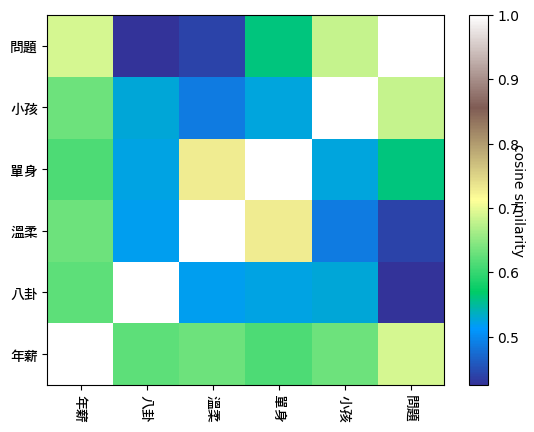

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np


font_path = '/content/drive/MyDrive/SOCI40133/粗黑體.ttc'
font_prop = FontProperties(fname=font_path)

fig, ax = plt.subplots()

hmap = ax.pcolor(heatmapMatrix, cmap='terrain')

cbar = plt.colorbar(hmap)
cbar.set_label('cosine similarity', rotation=270)

a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)


for tick in ax.get_xticklabels():
    tick.set_fontproperties(font_prop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(font_prop)


plt.show()

# Relationships Between Post Types

## Data visualization in 2D

In [ ]:
embedding_model = "text-embedding-3-small"
embedding_encoding = "cl100k_base"
max_tokens = 800  # the maximum for text-embedding-3-small is 8191

In [ ]:
!pip install tiktoken
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=cedec5311bc0adacdc54c4988f91f74ba7eeac44582d26940d49051b12d4efe9
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
ptt

,users,board,tittle,date,type,text,chinese_tokenized,pos_tagged,TaggedAbstracts
0,sky2030 (無業遊民),Boy-Girl,[心情] 出國巧遇台女趣事,2023-12,心情,最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...,"[最近, 常, 朋友, 一起, 跑, 胡志明, 河內, 玩, 玩什麼, 就, 不要, 問了,...","[(最近, f), (常, d), (朋友, n), (一起, m), (跑, v), (胡...","([最近, 常, 朋友, 一起, 跑, 胡志明, 河內, 玩, 玩什麼, 就, 不要, 問了..."
1,iamjimhaha (磨刀霍霍向肥羊),Boy-Girl,[討論] 找台女不找外配是不是因為不想養？,2023-12,討論,\n發現有些台男\n明明就找不到對象\n卻不願意找外籍\n\n是否是因為找台女還能要求有工作...,"[發現, 有些, 台男, 明明, 就, 找, 不到, 對象, 卻, 不願意, 找, 外籍, ...","[(發現, v), (有些, r), (台男, n), (明明, t), (就, d), (...","([發現, 有些, 台男, 明明, 就, 找, 不到, 對象, 卻, 不願意, 找, 外籍,..."
2,Sugimoto5566 (馬丁),Boy-Girl,"[討論] 印度移工如果來台,台女會怎麼選?",2023-11,討論,未來的有一天\n\n如果印度的移工來到台灣\n\n街上勢必有更多印度男\n\n印度男有深邃的...,"[未來, 有, 一天, 如果, 印度, 移工, 來, 到, 台灣, 街上, 勢必, 有, 多...","[(未來, t), (有, v), (一天, m), (如果, c), (印度, ns), ...","([未來, 有, 一天, 如果, 印度, 移工, 來, 到, 台灣, 街上, 勢必, 有, ..."
3,corydoras09 (),Boy-Girl,Re: [討論] 為何台女很少會主動認錯?,2023-11,討論,我有遇過那種我完全沒錯的女生\n死的都能掰成活的\n但那時候暈船暈的厲害\n所以一直舔\n現...,"[我, 有, 遇過, 那種, 我, 完全, 沒錯, 女生, 死, 能, 掰, 成活, 那, ...","[(我, r), (有, v), (遇, v), (過, ug), (那種, r), (我,...","([我, 有, 遇過, 那種, 我, 完全, 沒錯, 女生, 死, 能, 掰, 成活, 那,..."
4,drinkmuffin (暢飲鬆餅),Boy-Girl,Re: [討論] 為何台女很少會主動認錯?,2023-11,討論,\n \n？？？\n我遇到的比較多是台男才少主動認錯吧？\n \n一推愛面子愛到不行 說話...,"[我, 遇到, 較, 多, 台男, 才, 少主動, 認錯, 一, 推愛, 面子, 愛到, 不...","[(我, r), (遇到, v), (較, d), (多, m), (台男, n), (才,...","([我, 遇到, 較, 多, 台男, 才, 少主動, 認錯, 一, 推愛, 面子, 愛到, ..."
...,...,...,...,...,...,...,...,...,...
2964,ChrisDavis (工業電風扇),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,→ waitan: 你島棒球豚嘎器仔很多的 ...,"[你島, 棒球, 豚嘎器, 仔, 很多, 布布, 好, 兇, 布布, 怎麼, 會, 這樣, ...","[(你, r), (島, n), (棒球, n), (豚, n), (嘎, o), (器, ...","([你島, 棒球, 豚嘎器, 仔, 很多, 布布, 好, 兇, 布布, 怎麼, 會, 這樣,..."
2965,Vedan (味丹),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,\n這就惡性循環\n\n剛開始只有部分台男這樣\n\n然後讓部分台女食髓知味\n\n接著你本...,"[這就, 惡性, 循環, 剛開始, 只有, 部分, 台男, 這樣, 然後讓, 部分, 台女,...","[(這, r), (就, d), (惡性, b), (循環, vn), (剛, d), (開...","([這就, 惡性, 循環, 剛開始, 只有, 部分, 台男, 這樣, 然後讓, 部分, 台女..."
2966,takashi001 (沙花叉クロヱ的狗),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,確實\n\n與其看啦啦隊\n\n不如去交女朋友\n\n然後叫她穿拉拉隊服在你身上搖==\n\...,"[確實, 與, 其, 看, 隊, 不如, 去, 交, 女朋友, 然後叫, 她, 穿, 拉拉,...","[(確實, ad), (與, p), (其, r), (看, v), (隊, n), (不如...","([確實, 與, 其, 看, 隊, 不如, 去, 交, 女朋友, 然後叫, 她, 穿, 拉拉..."
2967,wahaha99 (我討厭人類),Marginalman,Re: [閒聊] 台女果然優質,2024-01,閒聊,\n雀食\n不過問題來了\n為什麼台男變這麼可悲\n\n全世界範圍\n好像台男特別可悲\n\...,"[雀食, 不過, 問題, 來, 為, 什麼, 台男, 變, 這麼, 可悲, 全世界, 範圍,...","[(雀食, n), (不過, c), (問題, n), (來, v), (為, p), (什...","([雀食, 不過, 問題, 來, 為, 什麼, 台男, 變, 這麼, 可悲, 全世界, 範圍..."


In [ ]:
matrix = ptt[['type']].to_numpy()

In [ ]:
# 创建中英文对照字典
translation_dict = {
    '心情': 'mood',
    '討論': 'discussion',
    '求助': 'help',
    '分享': 'share',
    '問卦': 'gossiping',
    '新聞': 'news',
    '閒聊': 'chat',
    '我推': 'recommendation',
    '問題': 'problem',
    '百合': 'les',
    '情報': 'information',
    '黑特': 'hate'
}

# 在 DataFrame 中替换中文值为英文值
ptt['type'] = ptt['type'].replace(translation_dict)


In [ ]:
unique_boards = ptt['type'].unique()
print(unique_boards)


['mood' 'discussion' 'help' 'share' nan 'gossiping' 'news' 'chat'
 'recommendation' 'problem' 'les' 'information' 'hate']


In [ ]:
# 创建映射字典，将板块内容映射为指定的数值
type_mapping = {'mood': 1, 'discussion': 2, 'help': 3,  'share': 4, 'gossiping': 5, 'news':6, 'chat': 8, 'recommendation':9,'problem':10,'les':11, 'information':12, 'hate':13 }

# 使用 replace() 函数进行映射
ptt['type'] = ptt['type'].replace(type_mapping)

In [ ]:
from sklearn.manifold import TSNE

# Create a t-SNE model
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)



In [ ]:
ptt = ptt.dropna(subset=['type'])

In [ ]:
# Fit and transform the data
vis_dims = tsne.fit_transform(ptt[['type']])

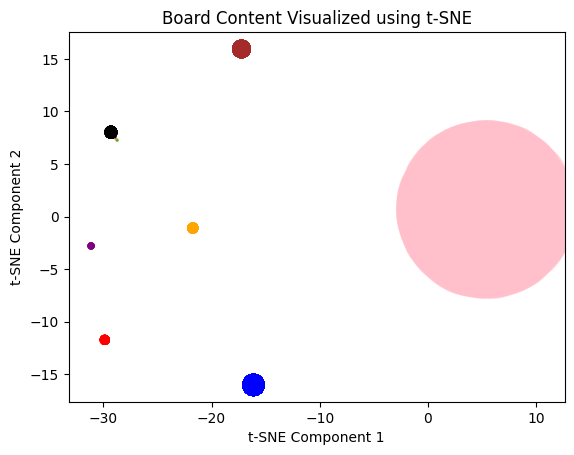

In [ ]:
# Extract the x and y coordinates
x = vis_dims[:, 0]
y = vis_dims[:, 1]

# Get the counts for each board for the sizing of the points
board_counts = ptt['type'].value_counts()
sizes = [board_counts[val] for val in ptt['type']]

# Define your colors - you can adjust these to match the first plot
colors = ["red", "blue", "orange","purple", "pink", "brown","grey", "black","darkred","darkorange", "gold", "turquoise", "darkgreen"]

# Create a colormap
colormap = matplotlib.colors.ListedColormap(colors)

# Scatter plot
plt.scatter(x, y, c=ptt['type'], cmap=colormap, s=sizes, alpha=0.3) # Adjust alpha to match the opacity in your first plot

# Title and labels
plt.title("Type Content Visualized using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Show the plot
plt.show()



# Emotion Analysis

## snownlp

In [ ]:
!pip install snownlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760944 sha256=73c3190dff2a09f0d3abc55f8f0313c1fb3cdfdf0a60b8f8f26b628132b5551b
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [ ]:
from snownlp import SnowNLP
import pandas as pd


def get_sentiment_score(text):
    s = SnowNLP(text)
    return 2 * s.sentiments - 1

ptt['sentiment_score'] = ptt['text'].apply(get_sentiment_score)

print(ptt[['text', 'sentiment_score']])


                                                   text  sentiment_score
0     最近常跟朋友一起跑胡志明，河內玩\n\n玩什麼就不要問了\n\n某天晚上 剛好在一間麵店吃飯...        -1.000000
1     \n發現有些台男\n明明就找不到對象\n卻不願意找外籍\n\n是否是因為找台女還能要求有工作...        -0.994199
2     未來的有一天\n\n如果印度的移工來到台灣\n\n街上勢必有更多印度男\n\n印度男有深邃的...         0.999377
3     我有遇過那種我完全沒錯的女生\n死的都能掰成活的\n但那時候暈船暈的厲害\n所以一直舔\n現...        -0.999991
4      \n \n？？？\n我遇到的比較多是台男才少主動認錯吧？\n \n一推愛面子愛到不行 說話...        -1.000000
...                                                 ...              ...
2964   → waitan: 你島棒球豚嘎器仔很多的                        ...        -0.999820
2965  \n這就惡性循環\n\n剛開始只有部分台男這樣\n\n然後讓部分台女食髓知味\n\n接著你本...        -0.999994
2966  確實\n\n與其看啦啦隊\n\n不如去交女朋友\n\n然後叫她穿拉拉隊服在你身上搖==\n\...        -0.918994
2967  \n雀食\n不過問題來了\n為什麼台男變這麼可悲\n\n全世界範圍\n好像台男特別可悲\n\...        -0.110951
2968  → Vedan: VT豚沒有這樣吧\n\n我認識一個VT除\n還是廚那種沒幾個人看得\n雖然...        -0.999984

[2964 rows x 2 columns]


<ipython-input-63-37d8b8440157>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt['sentiment_score'] = ptt['text'].apply(get_sentiment_score)


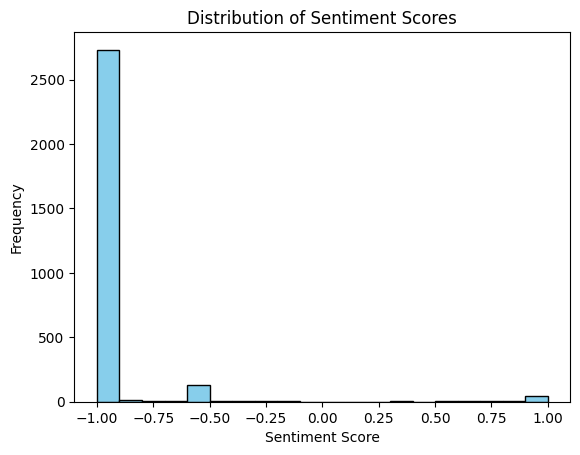

In [ ]:
import matplotlib.pyplot as plt


plt.hist(ptt['sentiment_score'], bins=20, color='skyblue', edgecolor='black')


plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')


plt.show()


## Check out articles related to negative emotions

In [ ]:
from collections import Counter

# 将文本拆分为单词，并计算词频
words = ' '.join(ptt[ptt['sentiment_score'] < 0]['text']).split()
word_counts = Counter(words)

# 打印出现频率最高的负面情感词汇
negative_keywords = [word for word, count in word_counts.items() if count > 10]
print(negative_keywords)


['=', '-', '。', '1.', '2.', '3.', '嘻嘻', '不', '對了', '喔', '哈哈', '失敗', '看到台灣很多55歲台女，不能接受未成年人類有性慾', '「好噁心，我兒子怎麼可能有性慾」', '「應該要把所有足以引起性慾的東西都禁止」', '「未成年有性慾根本是戀童癖」', '真的嗎', '台女真的覺得，未成年有性慾很噁心嗎', '有沒有八卦？', '根據我通勤時觀察台女的經驗', '很多台女（僅限辣妹', '阿嬤不討論）穿的鞋子都超醜', '明明衣服穿很辣', '或是西裝外套加黑絲', '結果鞋子穿超醜', '尤其是那種鞋子屁股有一塊大橡膠還什麼的', '有人知道為什麼鞋子要這樣穿嗎', '看到很多台女支持iWIN', '「噁心，未成年怎麼可以有性慾」', '「萬一我的兒子學會性行為怎麼辦」', '「我兒子還未成年，不可能有性慾」', '「如果我兒子談戀愛，一定打死他」', '45歲台女團體，真的覺得性行為很噁心，兒子不能性被污染嗎', '標題打', '單人露營', '但都經過剪接過，奇妙的是', '為啥台女躺著，做菜', '鏡頭還會移動?', '阿不是說單人嗎?', '然後角度都很故意，他媽的要露就露，一直遮遮掩掩的有夠不乾脆', '台女心機真的很重', '一群死肥宅斗內斗殺小', '有夠噁的', '有卦否?', '看到版上很多31歲單身台女說', '「未成年怎麼可以被性污染」', '「好噁心，正常人都愛31歲以上的」', '「iWIN可以讓我兒子不會被性污染」', '31歲單身台女真的覺得，兒子有性慾很噁心嗎', '安安如題', '眾所周知韓國是一個女權低落的地方', '如果是某些崇拜韓國的台女嫁給韓男', '卻沒有好好侍奉歐巴大人', '被超派鐵拳狠狠打一頓', '會不會報警處理？', '如果是被台男打', '早就告到對方脫褲子都不夠賠吧', '如果被韓男揍會比照辦理嗎？', '有掛？', '台女刺青的很多，沒有要戰刺不刺青拉', '但有些真的刺的很醜，像是手臂上畫五芒星跟六芒星', '該怎麼委婉的跟她說，請她去雷射掉呢', '這會不會是台灣少子化的潛在可能因素', '挂？', '世界日報/程嘉文', '台女兵公然毆打軍官', '兩大過汰除法辦', '義務役恢復為一年，部隊管理問題備受各界關注。就在此時，海軍繼光號巡防

In [ ]:
# 打印出负面情感分数最低的文本的上下文
low_sentiment_texts = ptt.sort_values('sentiment_score').head(5)['text']
for text in low_sentiment_texts:
    print("Text: ", text)
    # 打印前后文本
    # print("Context: ", ...)
    print("----------------------------------")



Text:  最近常跟朋友一起跑胡志明，河內玩

玩什麼就不要問了

某天晚上 剛好在一間麵店吃飯，隔壁桌坐了兩個台女

應該也是自由行來玩…

於是我就暗示我朋友不要講話 假裝聽不懂

安靜的吃麵

於是聽到台女各種抱怨胡志明

真的是快笑死…87%在台灣當慣了大小姐

他們邊吃還邊不時 往我們這裡打量

可能是因為我朋友頗帥的 又或是我們穿著不像越南人

吃完後 我們在店門口等車，她們也出來了    我們還是假裝聽不懂

其中一個女生 突然說要去廁所

回頭跟店家借廁所…然後當場被店家拒絕

我看她的表情 超級不爽 轉頭跟同伴抱怨

我心裡真的快笑死

自以為在台灣橫著走 出了國別人就要理你嗎？

越南最不缺的就是妹 ok?

於是我不演了 好意跟她說 你給個1-2萬盾（台幣10塊）他就借你了 如果你急的話

聽完她也不會說謝謝 繼續繃著臉…

好吧…我也不理她了

我們車來了就離開了

我猜 他們的os 可能是 搞屁啊 老娘在台灣可是一堆工具人 舔狗

沒想到來越南還要被門口阿桑白眼 上廁所 還要付錢…


說句難聽一點，也就台灣處處讓著台女而已，千萬不要以為自己真的是鑲金的

我朋友說 幹 你真的很靠北 但我喜歡！




----------------------------------
Text:  純講數學

一開始覺得
你用0.95的60次方=0.04
好像有點道理


但想想
不對啊

臺女應該是個固定的母群體

所以你討論的狀況 應該改寫成數學題是:

若有100個球 ，其中有5個是白球，95個是黑球。

每次取一球，不重複的取60次
請問取到白球的機率是多少?

(我高中數學不好
 誰來算一下排列組合?


或者是
不重複一直取，直到取出白球為止，求其機率?


###


而且你又隱藏了奇怪的前提

一般人窮一生，怎麼可能追妹60次阿

要認識，失敗要休息重開機，
算有效率，半年，
60次要30年欸

當然同時多線追妹，會比較有效率
不過這又另一個話題了。



----------------------------------
Text:  

你是假設全世界男人都死了
該台女只有你一個能選擇是嗎?

如果你追了60個女生
那我們公平一點
假設該台女也同時有60個男子追求好了
而且是你所謂的優質台女
照理講應該有100個以上的男子在追求

## Sentiment Score vs. Year

Since there is too little data in 2016,2017,2018, we will use it from 2019

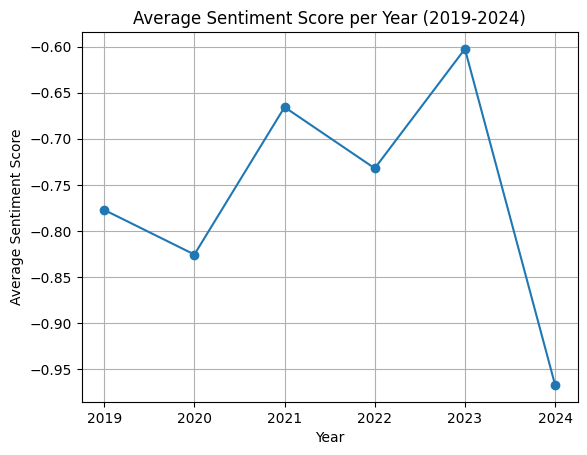

In [ ]:
import matplotlib.pyplot as plt


filtered_data = ptt[(ptt['year'] >= 2019) & (ptt['year'] <= 2024)]


yearly_avg_sentiment = filtered_data.groupby('year')['sentiment_score'].mean()


plt.plot(yearly_avg_sentiment.index, yearly_avg_sentiment.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Year (2019-2024)')
plt.xticks(yearly_avg_sentiment.index)
plt.grid(True)
plt.show()
